In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [23]:
class Image:
    def __init__(self, path):
        self.image = cv2.imread(path, 0)

    def show_image(self):
        cv2.imshow('Before modification', self.image)
        cv2.waitKey(0)
    
    
    def generate_salt_and_pepper_noise(self, threshold):
        height, width = self.image.shape

        # Create a copy of the image for modification
        noisy_image = np.copy(self.image)

        # Apply salt and pepper noise
        for i in range(height):
            for j in range(width):
                # Generate a random number between 0 and 1
                random_value = np.random.rand()

                # Check if the random value is below the threshold for salt noise
                if random_value < threshold / 2:
                    # Set the pixel to maximum intensity (255)
                    noisy_image[i, j] = 255

                # Check if the random value is above 1 - threshold for pepper noise
                elif random_value > 1 - threshold / 2:
                    # Set the pixel to minimum intensity (0)
                    noisy_image[i, j] = 0

        return noisy_image

    def median_filter(self, noisy_image, kernel_size):
        height, width = noisy_image.shape

        # Create a copy of the noisy image for modification
        filtered_image = np.copy(noisy_image)

        # Apply median filtering
        half_kernel_size = kernel_size // 2
        for i in range(half_kernel_size, height - half_kernel_size):
            for j in range(half_kernel_size, width - half_kernel_size):
                # Extract the neighborhood pixels
                neighborhood = noisy_image[i - half_kernel_size: i + half_kernel_size + 1,
                                            j - half_kernel_size: j + half_kernel_size + 1]
                # Calculate the median value of the neighborhood
                median_value = np.median(neighborhood)
                # Set the pixel to the median value
                filtered_image[i, j] = median_value

        return filtered_image



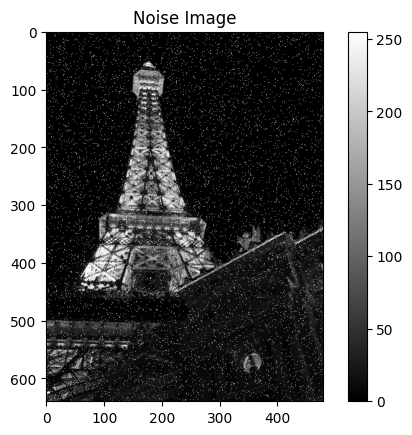

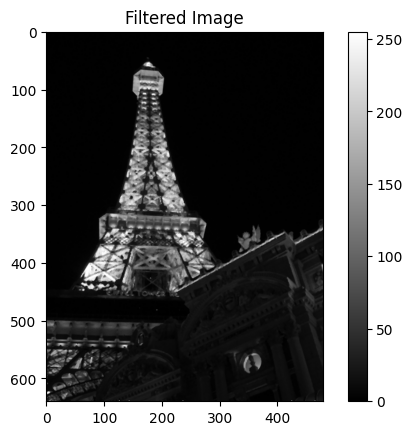

In [24]:
img=Image("D:\desktop\Sixth Semester\Image Processing\Assignments\Assignment 2/01.jpg")
img.show_image()
Noise_img=img.generate_salt_and_pepper_noise(threshold=0.05)
Filtered_img=img.median_filter(Noise_img,kernel_size=3)
plt.imshow( Noise_img , cmap='gray')
plt.title(f'Noise Image')
plt.colorbar()
plt.show()
plt.imshow( Filtered_img , cmap='gray')
plt.title(f'Filtered Image')
plt.colorbar()
plt.show()